<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/ExamRoom_AI_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **problem statement**:This case study delves into the dynamic landscape of online retail by analyzing a comprehensive transactional dataset spanning the years 2010 to 2011. With a primary focus on enhancing marketing strategies and boosting sales, the objective is to dissect customer behavior and preferences through meticulous segmentation.


invoiceNo: This column contains the invoice number for each transaction. It is likely a unique identifier for each purchase made. Each invoice number represents a single transaction that could include multiple items.

StockCode: This column contains the code assigned to each product in inventory. The stock code uniquely identifies each product, allowing for tracking and inventory management.

Description: This column contains the textual description of each product. It provides details about the product, such as its name, type, or other distinguishing characteristics.

Quantity: This column contains the number of units of the product purchased in each transaction. It indicates how many items of the particular product were bought in that transaction.

InvoiceDate: This column contains the date and possibly the time when the transaction (or invoice) was generated. It helps in tracking when the purchase was made.

UnitPrice: This column contains the price per unit of the product. It represents how much one unit of the product costs.

CustomerID: This column contains a unique identifier for each customer. It helps in identifying which customer made the purchase, allowing for customer-specific analysis.

Country: This column contains the name of the country where the customer resides or where the purchase was made. It is useful for geographical analysis of sales data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt




In [ ]:
data= pd.read_csv("/content/data(in).csv", encoding='latin1')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [ ]:
# Handle missing values
data.dropna(subset=['CustomerID'], inplace=True)


In [ ]:
# Convert data types
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

In [ ]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [ ]:
data['UnitPrice'].unique()

array([2.55000e+00, 3.39000e+00, 2.75000e+00, 7.65000e+00, 4.25000e+00,
       1.85000e+00, 1.69000e+00, 2.10000e+00, 3.75000e+00, 1.65000e+00,
       4.95000e+00, 9.95000e+00, 5.95000e+00, 7.95000e+00, 8.50000e-01,
       6.50000e-01, 1.25000e+00, 2.95000e+00, 1.95000e+00, 4.20000e-01,
       1.80000e+01, 1.06000e+00, 6.95000e+00, 1.09500e+01, 3.45000e+00,
       5.50000e-01, 3.80000e-01, 1.45000e+00, 3.95000e+00, 6.75000e+00,
       2.75000e+01, 1.49500e+01, 1.69500e+01, 4.65000e+00, 6.45000e+00,
       1.27500e+01, 1.99500e+01, 8.50000e+00, 3.82000e+00, 3.37000e+00,
       5.45000e+00, 6.35000e+00, 7.20000e-01, 6.40000e-01, 1.00000e-01,
       3.20000e-01, 1.48000e+00, 2.90000e-01, 1.65000e+02, 3.57500e+01,
       3.35000e+00, 1.06500e+01, 1.50000e+01, 9.50000e-01, 2.10000e-01,
       1.20000e-01, 2.40000e-01, 3.25000e+00, 1.49000e+00, 2.25000e+00,
       1.55000e+00, 1.89500e+01, 8.95000e+00, 5.00000e+01, 2.99500e+01,
       4.60000e+00, 1.05000e+00, 5.49000e+00, 1.90000e-01, 1.075

In [ ]:
##Remove negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [ ]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

<ipython-input-84-603dfb09de1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


In [ ]:
print(data[['Quantity', 'UnitPrice', 'TotalAmount']].head())

   Quantity  UnitPrice  TotalAmount
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


In [ ]:
# Group data by CustomerID and count unique invoices

customer_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

In [ ]:
data['Frequency'] = data['CustomerID'].map(customer_frequency)


In [ ]:
# Group data by CustomerID and calculate total monetary value
customer_monetary = data.groupby('CustomerID')['TotalAmount'].sum()



In [ ]:
# Create Monetary column in the original data
data['Monetary'] = data['CustomerID'].map(customer_monetary)

# ###**Exploratory** Data Analysis (EDA)

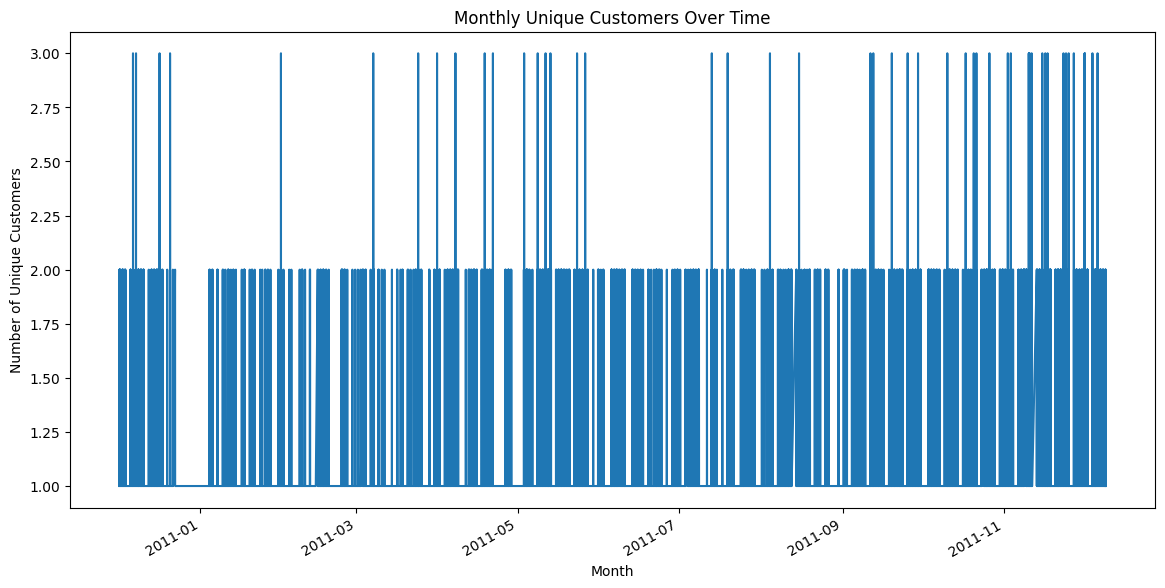

In [ ]:
# Number of unique customers per month
monthly_customers = data.groupby('InvoiceDate')['CustomerID'].nunique()

# Plot number of customers per month
plt.figure(figsize=(14, 7))
monthly_customers.plot()
plt.title('Monthly Unique Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()



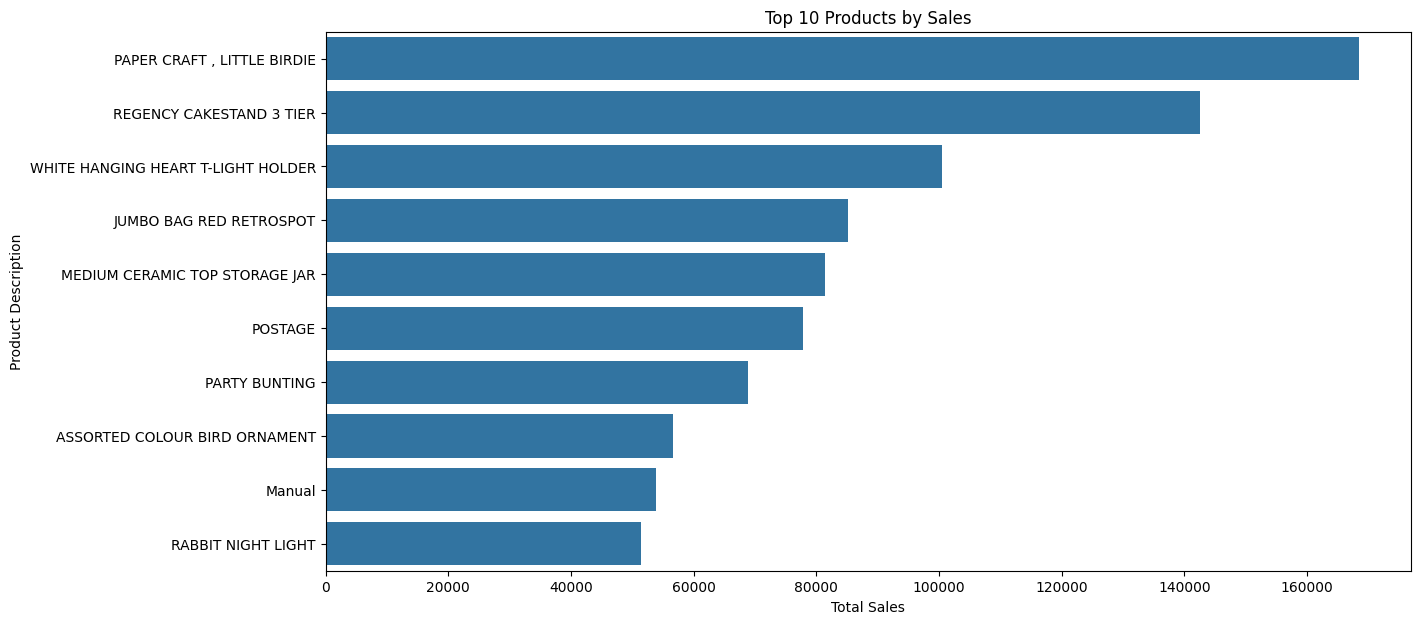

In [ ]:
# Product Analysis

# Top 10 products by sales volume
top_products = data.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()


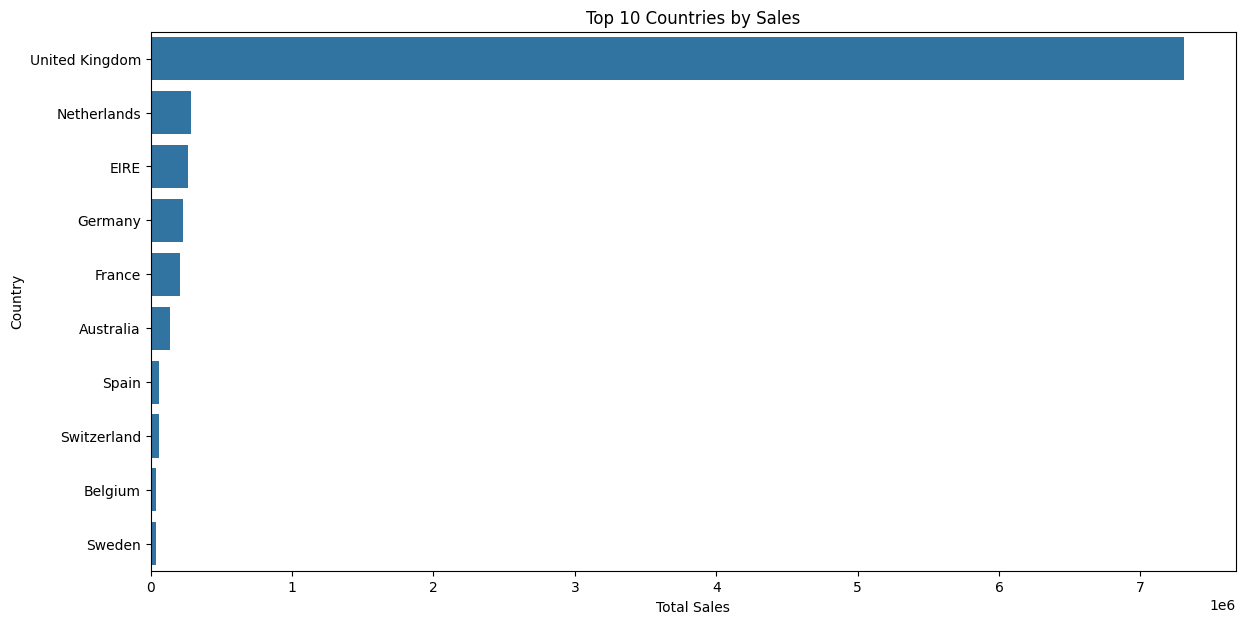

In [ ]:
# Sales distribution by country
country_sales = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Plot top 10 countries by sales
plt.figure(figsize=(14, 7))
sns.barplot(x=country_sales.head(10).values, y=country_sales.head(10).index)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


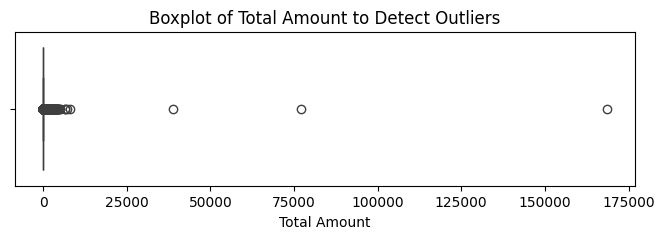

In [ ]:
# Boxplot to detect outliers in TotalAmount
plt.figure(figsize=(8, 2))
sns.boxplot(x='TotalAmount', data=data)
plt.title('Boxplot of Total Amount to Detect Outliers')
plt.xlabel('Total Amount')
plt.show()



In [ ]:
# Identify transactions with extremely high TotalAmount
high_value_transactions = data[data['TotalAmount'] > data['TotalAmount'].quantile(0.99)]
print(high_value_transactions)


       InvoiceNo StockCode                      Description  Quantity  \
46        536371     22086  PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258       VICTORIAN SEWING BOX LARGE        32   
178       536387     79321                    CHILLI LIGHTS       192   
179       536387     22780   LIGHT GARLAND BUTTERFILES PINK       192   
180       536387     22779       WOODEN OWLS LIGHT GARLAND        192   
...          ...       ...                              ...       ...   
540442    581487     21137         BLACK RECORD COVER FRAME       120   
541222    581495    15056N        EDWARDIAN PARASOL NATURAL        36   
541223    581495   15056BL          EDWARDIAN PARASOL BLACK        36   
541702    581566     23404       HOME SWEET HOME BLACKBOARD       144   
541892    581586     21217    RED RETROSPOT ROUND CAKE TINS        24   

               InvoiceDate  UnitPrice  CustomerID         Country  \
46     2010-12-01 09:00:00       2.55       13748  Uni

In [ ]:
data['InvoiceNo'].describe()

count     397884
unique     18532
top       576339
freq         542
Name: InvoiceNo, dtype: object

In [ ]:
data['Frequency'].describe()

count    397884.000000
mean         18.785264
std          37.380455
min           1.000000
25%           3.000000
50%           7.000000
75%          15.000000
max         209.000000
Name: Frequency, dtype: float64

In [ ]:
data['Monetary'].describe()

count    397884.000000
mean      11517.260478
std       31284.873214
min           3.750000
25%        1101.970000
50%        2656.130000
75%        6287.770000
max      280206.020000
Name: Monetary, dtype: float64

## **RFM** Segmentation

In [ ]:
# Calculate RFM metrics
current_date= data['InvoiceDate'].max()
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'})

# Calculate quantiles
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])
print(quantiles)

# Function to assign R, F, M scores
def rfm_score(x, col, q):
    if x <= q[col][0.25]:
        return 1
    elif x <= q[col][0.50]:
        return 2
    elif x <= q[col][0.75]:
        return 3
    else:
        return 4

# Assign R, F, M scores
rfm_data['R_Score'] = rfm_data['Recency'].apply(rfm_score, args=('Recency', quantiles,))
rfm_data['F_Score'] = rfm_data['Frequency'].apply(rfm_score, args=('Frequency', quantiles,))
rfm_data['M_Score'] = rfm_data['Monetary'].apply(rfm_score, args=('Monetary', quantiles,))

# Combine RFM score
rfm_data['RFM_Segment'] = rfm_data.apply(lambda x: f"{x['R_Score']}{x['F_Score']}{x['M_Score']}", axis=1)
rfm_data['RFM_Score'] = rfm_data[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print(rfm_data.head())

      Recency  Frequency  Monetary
0.25     17.0        1.0   307.415
0.50     50.0        2.0   674.485
0.75    141.0        5.0  1661.740
            Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346           325          1  77183.60        4        1        4   
12347             1          7   4310.00        1        4        4   
12348            74          4   1797.24        3        3        4   
12349            18          1   1757.55        2        1        4   
12350           309          1    334.40        4        1        2   

           RFM_Segment  RFM_Score  
CustomerID                         
12346        4.01.04.0          9  
12347        1.04.04.0          9  
12348        3.03.04.0         10  
12349        2.01.04.0          7  
12350        4.01.02.0          7  


##**Customer** Segmentation using K-means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_to_scale = rfm_data[['Recency', 'Frequency', 'Monetary']]
data_scaled = scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame for better readability
data_scaled_df = pd.DataFrame(data_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Inspect the scaled data
print(data_scaled_df.head())

    Recency  Frequency  Monetary
0  2.334574  -0.425097  8.358668
1 -0.905340   0.354417  0.250966
2 -0.175360  -0.035340 -0.028596
3 -0.735345  -0.425097 -0.033012
4  2.174578  -0.425097 -0.191347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

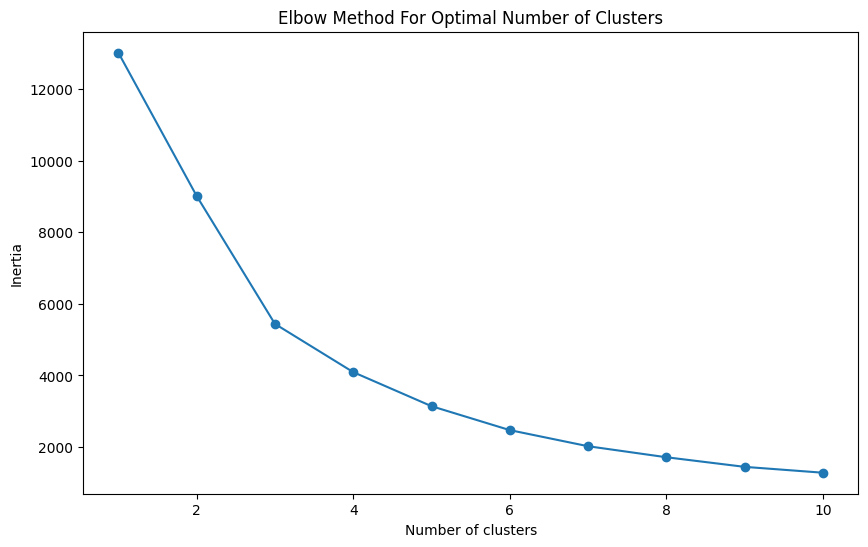

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


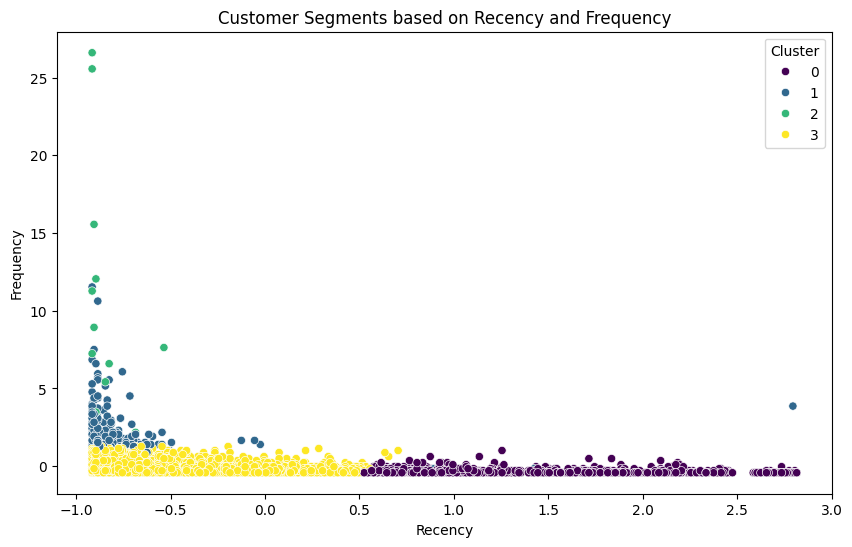

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_scaled_df ['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=data_scaled_df, palette='viridis')
plt.title('Customer Segments based on Recency and Frequency')
plt.show()


In [ ]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled_df, data_scaled_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7812511047218021


# Analyze the clusters

In [ ]:

cluster_analysis = data_scaled_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_analysis)



          Recency  Frequency   Monetary
Cluster                                
0        1.560235  -0.353409  -0.175359
1       -0.768614   2.309357   1.156958
2       -0.851496  10.168289  13.938734
3       -0.486148  -0.079994  -0.078339
